In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
#Libraries for data pre-processing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

blobs = pd.read_csv('1322_employees.csv')
colnames = list(blobs.columns[1:-1])
blobs.head()

,Employee Name,Company Department,Industry,Region,Client Capacity (Count),Experience (Years),Designation
0,Melissa Nash,Corporate Banking,Media and Entertainment,Asia Pacific,6,14,Private
1,Crystal Cabrera,Global Markets,Financials,"Europe, Middle East & Africa",2,2,Private
2,Janet Garcia,Investment Banking,Materials,"Europe, Middle East & Africa",6,13,Public
3,Stacey Barnes,Investment Banking,Real Estate,"Europe, Middle East & Africa",5,10,Private
4,Jason Mahoney,Global Markets,Materials,Latin America,9,14,Public


In [66]:
#columns to encode

to_encode = ["Company Department","Industry", "Region","Designation"]
transformed_blobs = blobs
for column in transformed_blobs.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(transformed_blobs[column].astype(str))
        transformed_blobs[column]=le.transform(transformed_blobs[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)


{'Corporate Banking': 0, 'Global Markets': 1, 'Investment Banking': 2}
{'Consumer Discretionary': 0, 'Consumer Staples': 1, 'Education': 2, 'Energy': 3, 'Financials': 4, 'Healthcare': 5, 'Industrials': 6, 'Materials': 7, 'Media and Entertainment': 8, 'Real Estate': 9, 'Technology': 10, 'Telecommunications': 11, 'Transportation': 12, 'Utilities': 13}
{'Asia Pacific': 0, 'Europe, Middle East & Africa': 1, 'Latin America': 2, 'North America': 3}
{'Private': 0, 'Public': 1}


In [67]:
relevant_cols = ["Company Department","Industry", "Region","Client Capacity (Count)", "Experience (Years)",]

employees_df = transformed_blobs[relevant_cols]

In [68]:
employees_df.to_excel("encoded_employees.xlsx")

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(employees_df)

scaled_data = scaler.transform(employees_df)

In [70]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

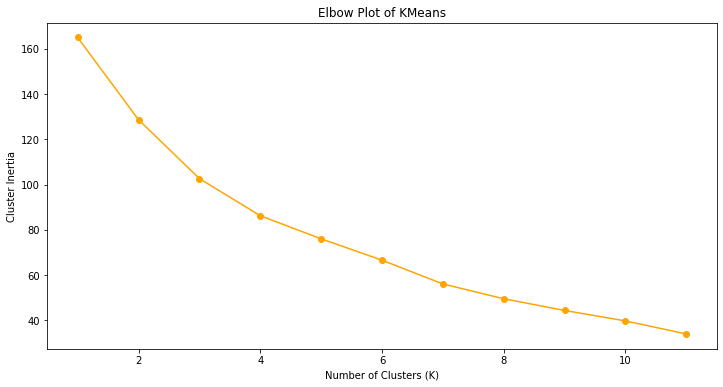

In [71]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [72]:
# kmeans_model = KMeans(n_clusters = 6)

kmeans_model = KMeans(n_clusters=6, random_state=1234)
kmeans_model.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [73]:
blobs["clusters"] = kmeans_model.labels_

blobs.head()

,Employee Name,Company Department,Industry,Region,Client Capacity (Count),Experience (Years),Designation,clusters
0,Melissa Nash,0,8,0,6,14,0,3
1,Crystal Cabrera,1,4,1,2,2,0,5
2,Janet Garcia,2,7,1,6,13,1,4
3,Stacey Barnes,2,9,1,5,10,0,4
4,Jason Mahoney,1,7,2,9,14,1,1


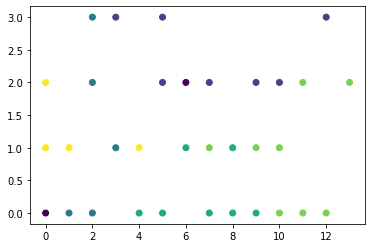

In [74]:
plt.scatter(blobs["Industry"], 
            blobs["Region"],
            c = blobs["clusters"])

In [75]:
blobs['clusters'].value_counts()

4    8
3    7
1    7
2    5
5    4
0    2
Name: clusters, dtype: int64

In [76]:
test = pd.read_excel('employee_test.xlsx')

In [77]:
test

,Employee Name,Company Department,Industry,Region,Client Capacity (Count),Experience (Years),Designation
0,Maria Martin,Investment Banking,Transportation,North America,4,12,Private
1,Seth Anderson,Global Markets,Utilities,Asia Pacific,5,19,Private
2,Angel Carroll,Global Markets,Technology,North America,5,10,Public
3,Sharon Jacobs,Global Markets,Consumer Discretionary,North America,2,4,Public
4,Shannon Walker,Corporate Banking,Transportation,North America,1,9,Public
5,Peter Lawrence,Corporate Banking,Consumer Discretionary,Asia Pacific,4,4,Public
6,Mark Richards,Global Markets,Hospitality,Latin America,4,5,Public
7,Susan Freeman,Global Markets,Technology,Latin America,2,14,Public
8,Brent Williams,Corporate Banking,Financials,North America,4,23,Private
9,Whitney Martinez,Corporate Banking,Education,"Europe, Middle East & Africa",3,24,Private


In [78]:
transformed_test = test

In [79]:
to_encode = ["Company Department","Industry", "Region","Designation"]
transformed_test = transformed_test.fillna('na')
for column in transformed_test.columns:
    if column in to_encode:
        le = preprocessing.LabelEncoder()
        le.fit(transformed_test[column].astype(str))
        transformed_test[column]=le.transform(transformed_test[column])
        keys = le.classes_
        values = le.transform(le.classes_)
        dictionary = dict(zip(keys, values))
        print(dictionary)

{'Corporate Banking': 0, 'Global Markets': 1, 'Investment Banking': 2}
{'Consumer Discretionary': 0, 'Consumer Staples': 1, 'Education': 2, 'Energy': 3, 'Financials': 4, 'Healthcare': 5, 'Hospitality': 6, 'Industrials': 7, 'Materials': 8, 'Real Estate': 9, 'Technology': 10, 'Transportation': 11, 'Utilities': 12}
{'Asia Pacific': 0, 'Europe, Middle East & Africa': 1, 'Latin America': 2, 'North America': 3}
{'Private': 0, 'Public': 1}


In [80]:
relevant_cols = ["Company Department","Industry", "Region","Client Capacity (Count)", "Experience (Years)"]

transformed_test = transformed_test[relevant_cols]

new_predict=kmeans_model.predict(transformed_test)

test["clusters"] = new_predict

In [81]:
transformed_test

,Company Department,Industry,Region,Client Capacity (Count),Experience (Years)
0,2,11,3,4,12
1,1,12,0,5,19
2,1,10,3,5,10
3,1,0,3,2,4
4,0,11,3,1,9
5,0,0,0,4,4
6,1,6,2,4,5
7,1,10,2,2,14
8,0,4,3,4,23
9,0,2,1,3,24


In [82]:
blobs.to_excel("clustered_employees.xlsx")

In [83]:
test.loc[test['clusters'] == 2]

,Employee Name,Company Department,Industry,Region,Client Capacity (Count),Experience (Years),Designation,clusters
3,Sharon Jacobs,Global Markets,Consumer Discretionary,North America,2,4,Public,2
5,Peter Lawrence,Corporate Banking,Consumer Discretionary,Asia Pacific,4,4,Public,2
8,Brent Williams,Corporate Banking,Financials,North America,4,23,Private,2
9,Whitney Martinez,Corporate Banking,Education,"Europe, Middle East & Africa",3,24,Private,2
11,Brandon Lopez,Global Markets,Energy,"Europe, Middle East & Africa",5,24,Private,2
17,Amy Davenport,Corporate Banking,Hospitality,"Europe, Middle East & Africa",3,23,Public,2
21,Justin Ortega Jr.,Global Markets,Consumer Staples,Asia Pacific,1,12,Public,2
24,Lisa Potts,Investment Banking,Hospitality,"Europe, Middle East & Africa",5,21,Private,2
25,William Simpson,Corporate Banking,Financials,North America,2,24,Private,2
28,Elizabeth Lang,Investment Banking,Hospitality,Latin America,2,24,Private,2


In [84]:
import pickle

In [85]:
with open(r'clustering.pickle', 'wb') as f:
    pickle.dump(kmeans_model, f)